In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

from tqdm import tqdm
tqdm.pandas(desc='progress bar:')

import numpy as np

In [2]:
def check_text(s):
    for symbol in s:
        if symbol not in "\" abcdefghijklmnopqrstuvwxyz'":
            return ('FAIL',symbol)
    else:
        return 'OK'

In [3]:
import Levenshtein
def calcWer(s1, s2):
    s1 = str(s1)
    s2 = str(s2)
    b = set(s1.split() + s2.split())
    word2char = dict(zip(b, range(len(b))))
    w1 = [chr(word2char[w]) for w in s1.split()]
    w2 = [chr(word2char[w]) for w in s2.split()]
    return Levenshtein.distance(''.join(w1), ''.join(w2)) / len(''.join(w2)) 

In [4]:
df = pd.read_csv("./uz_regular1.csv")

<ipython-input-4-52daabeac342>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./uz_regular1.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135811 entries, 0 to 135810
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           135811 non-null  int64  
 1   audio                        135811 non-null  object 
 2   golden_status                135811 non-null  object 
 3   status                       135811 non-null  object 
 4   transcriber                  135811 non-null  object 
 5   superviser                   135811 non-null  object 
 6   golden_transcription         1880 non-null    object 
 7   transcriber_transcription    135809 non-null  object 
 8   theme                        135811 non-null  object 
 9   robot_transcription          135493 non-null  object 
 10  timestamp_create             135811 non-null  int64  
 11  timestamp_change             135811 non-null  int64  
 12  transcriber_id               135811 non-null  int64  
 13 

In [8]:
df.isnull().any()

id                             False
audio                          False
golden_status                  False
status                         False
transcriber                    False
superviser                     False
golden_transcription            True
transcriber_transcription       True
theme                          False
robot_transcription             True
timestamp_create               False
timestamp_change               False
transcriber_id                 False
superviser_id                  False
score_transcriber              False
wer                            False
pool                           False
sex                            False
speakers                       False
language                       False
transcriber_type2               True
transcriber_id_type2            True
superviser_type2                True
superviser_id_type2             True
tags                            True
emotion                         True
score_transcriber_type2         True
c

In [10]:
df = df[df["transcriber_transcription"].notnull()]

In [28]:
df["transcriber_transcription"] = df["transcriber_transcription"].str.lower()

<ipython-input-28-834a3cac85ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transcriber_transcription"] = df["transcriber_transcription"].str.lower()


In [29]:
df["bad"] = df["transcriber_transcription"].apply(lambda x: check_text(x))

<ipython-input-29-8ca8003a261e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bad"] = df["transcriber_transcription"].apply(lambda x: check_text(x))


In [30]:
ind_drop = df[df["bad"] != "OK"].index

In [31]:
len(ind_drop)

8545

In [32]:
df[df["bad"] != "OK"][["transcriber_transcription", "bad"]]

,transcriber_transcription,bad
20,to'laymiz yaqinda ?,"(FAIL, ?)"
28,o'ninchi ? keyin,"(FAIL, ?)"
36,? da,"(FAIL, ?)"
75,? keyin ? to'laymiz,"(FAIL, ?)"
111,? to'laymiz,"(FAIL, ?)"
...,...,...
135784,xabarim bor ? eng oxirgi sana o'ninchi sanagacha mana shu oyni o'ni,"(FAIL, ?)"
135789,bugun nimamiz zagruzka bo'lsa nasib bo'lsa bugun kechki ili ?,"(FAIL, ?)"
135791,? hozir chiqqandan ? qancha qolgan aka bugun to'rt yuz ellik ming tushgan edi shuni ham yechib oldida,"(FAIL, ?)"
135797,voy bumi men ? men yo'q edim bu ? sim karta sotib olgan edim men,"(FAIL, ?)"


In [33]:
df["bad"].value_counts()

bad
OK           127264
(FAIL, ?)      8543
(FAIL, ;)         1
(FAIL, -)         1
Name: count, dtype: int64

In [34]:
df.drop(ind_drop, inplace=True)

<ipython-input-34-8aeb4d3731c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind_drop, inplace=True)


In [35]:
df["bad"].value_counts()

bad
OK    127264
Name: count, dtype: int64

In [36]:
df["language"] = df["language"].str.lower()

<ipython-input-36-da32e7e22d03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"] = df["language"].str.lower()


In [37]:
df["language"].value_counts()

language
uz        110604
uzru        9775
uzru3       4445
ru          2325
kar           74
uz/kar        37
far            4
Name: count, dtype: int64

In [39]:
df[df["language"] == "uzru"][["transcriber_transcription", "language"]]

,transcriber_transcription,language
98,aaa tushmayapti karta shuni kutyapman,uzru
124,schjot olib tashlayman,uzru
126,sun'iy intellektmisiz siz,uzru
316,karta o'zi karta orqali,uzru
317,a plastik orqalida,uzru
...,...,...
135710,o'zi kesib ketmayapti ku plastigimdan,uzru
135718,to'lashga vaqtim bo'lmadi pulim bor naqd pulda edi plastigimda emas edida plastigimda bo'lganida yechib olar edi ertaga,uzru
135725,aa anavi sharoit yetishmadi ikkita kredit olgan edim aka unga kechikib ketib qoldida,uzru
135742,a to'lovni olganmiz plastikdan,uzru


In [40]:
df["language"] = df["language"].str.replace("uzru", "uz")

<ipython-input-40-86b661327695>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"] = df["language"].str.replace("uzru", "uz")


In [41]:
df["language"].value_counts()

language
uz        120379
uz3         4445
ru          2325
kar           74
uz/kar        37
far            4
Name: count, dtype: int64

In [42]:
df[df["language"] == "uz3"][["transcriber_transcription", "language"]]

,transcriber_transcription,language
86,to'ladim ku kecha to'ladim ku menga qayerdan kelib qoldi u soobschenija,uz3
122,bir minut,uz3
207,nomerimni kim berdi,uz3
273,men kreditim hali to'lanmaganmi hozir,uz3
2057,da da assalomu alaykum labbay,uz3
...,...,...
135792,ha men nimada ukajon plastigimni yo'qotgan edikda shuni bugun borib plastikni qayta,uz3
135794,besh o'n beshinchi sanagacha to'laymiz ku bizlar har doim to'lab kelganmiz ku bizlar zavodda o'n uchinchi o'n beshinchi sana kuni oylik tushadi o'sha kuni to'laymiz har doim,uz3
135802,yo'q aka bu nomerni egasi yo'q men boshqa odam bu nomerni egasiga aytib qo'yaman to'laydi,uz3
135808,yo'q mana shu haftani oxirigacha oylik tushadida o'zi ulanib turibdi ku plastik srazu qirqib oladi o'zi har oy qirqyapti ku,uz3


In [43]:
df["language"] = df["language"].str.replace("uz3", "uz")

<ipython-input-43-d500bb929803>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"] = df["language"].str.replace("uz3", "uz")


In [44]:
df["language"].value_counts()

language
uz        124824
ru          2325
kar           74
uz/kar        37
far            4
Name: count, dtype: int64

In [45]:
df[df["language"] == "kar"][["transcriber_transcription", "language"]]

,transcriber_transcription,language
923,ova ova,kar
1761,ova,kar
2010,ova ova ova,kar
2941,ova menman,kar
3175,ova men,kar
...,...,...
117785,yetti o'nidan keyin oylik tushadi yettinchisidami sakkizida oylik tushsa to'lab beraman,kar
117799,shu o'ni o'nidan keyin oylik tushsin to'layman,kar
118021,hali oylik tushmadi xudo xohlasa ish hafta tushish extimoli bor,kar
126239,to'laymiz xudo xohlasa tushsin bolam oylik tushsin o'n olti,kar


In [46]:
df["language"] = df["language"].str.replace("kar", "uz")

<ipython-input-46-caff73deacfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"] = df["language"].str.replace("kar", "uz")


In [47]:
df[df["language"] == "far"][["transcriber_transcription", "language"]]

,transcriber_transcription,language
9081,har doimday shunday to'laymiz ha to'lab kelgan ku shunday to'lab kelamizda,far
9757,endi topa olsak to'layman topa olmasak shu o'n beshigacha zoodmall,far
38793,yo'q shuni o'ninchi chislogacha oylik tushsa to'lash bo'lmaydimi,far
54319,o'n beshiga dedim o'n beshiga opa o'n beshiga to'laymiz bizlar postojanno,far


In [48]:
df["language"] = df["language"].str.replace("far", "uz")

<ipython-input-48-b1c8423e0b66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"] = df["language"].str.replace("far", "uz")


In [50]:
df["language"].value_counts()

language
uz       124902
ru         2325
uz/uz        37
Name: count, dtype: int64

In [51]:
df[df["language"] == "uz/uz"][["transcriber_transcription", "language"]]

,transcriber_transcription,language
788,ova ova men men,uz/uz
3201,axtarib ko'ramiz,uz/uz
4378,ova ova menman,uz/uz
5125,ova ova to'g'ri,uz/uz
7634,ova ova qanday kompaniyadan deysan,uz/uz
10353,kreditda kreditim bor,uz/uz
11097,ova to'lay olaman,uz/uz
11807,ha to'layman ova,uz/uz
14224,ovada,uz/uz
38617,o men plastikka oylik tushmayapti oylik tushsa aytaman,uz/uz


In [52]:
df["language"] = df["language"].str.replace("uz/uz", "uz")

<ipython-input-52-a9278ed8ff1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"] = df["language"].str.replace("uz/uz", "uz")


In [53]:
df["language"].value_counts()

language
uz    124939
ru      2325
Name: count, dtype: int64

In [54]:
lang_drop = df[df["language"] == "ru"].index

In [55]:
len(lang_drop)

2325

In [56]:
df.drop(lang_drop, inplace=True)

<ipython-input-56-aaa05e04707a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(lang_drop, inplace=True)


In [57]:
df["language"].value_counts()

language
uz    124939
Name: count, dtype: int64

In [59]:
df['wer'] = df[['robot_transcription', 'transcriber_transcription']].apply(lambda x:calcWer(x.robot_transcription, x.transcriber_transcription), axis=1)

<ipython-input-59-7e43b5593776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wer'] = df[['robot_transcription', 'transcriber_transcription']].apply(lambda x:calcWer(x.robot_transcription, x.transcriber_transcription), axis=1)


In [60]:
df['wer'].value_counts()

wer
0.000000    45191
0.500000    27897
1.000000    12635
0.666667     9052
0.333333     6649
            ...  
1.285714        1
0.590909        1
0.655172        1
0.205128        1
0.121212        1
Name: count, Length: 277, dtype: int64

In [68]:
df["golden_transcription"] = df["transcriber_transcription"].str.strip()

<ipython-input-68-386bbeaa9bf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["golden_transcription"] = df["transcriber_transcription"].str.strip()


In [69]:
df["length"] = df["transcriber_transcription"].str.split().str.len()

<ipython-input-69-c3b9b689d734>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["length"] = df["transcriber_transcription"].str.split().str.len()


In [70]:
df["length"].value_counts()

length
2     39285
1     22916
3     22481
4     10264
5      7682
6      4809
7      3714
8      2953
9      2296
10     1831
11     1444
12     1063
13      881
14      675
15      552
16      411
17      363
18      271
19      211
20      138
21      125
22      112
23       80
24       70
25       60
27       48
26       38
28       37
30       28
29       24
32       18
31       17
34       10
33        8
37        8
35        6
36        4
38        3
39        2
40        1
Name: count, dtype: int64

In [87]:
df[df["length"] == 1]["transcriber_transcription"].value_counts().head(30)

transcriber_transcription
hop              791
aha              772
ertaga           647
ha               627
yo'q             604
eshitaman        531
tushunmadim      516
mxm              303
bugun            247
albatta          239
kim              227
labbay           194
assalom          161
bo'ladi          141
salom            137
yaxshi           130
nimani           126
to'layman        120
to'laymiz        114
yaxshimisiz      114
mayli            105
men               94
tushunarli        87
shunday           86
eshityapman       86
to'g'ri           84
haa               82
kartadan          80
eshityapsizmi     79
nima              78
Name: count, dtype: int64

In [81]:
allo_ind = df[(df["transcriber_transcription"].str.contains("allo")) & (df["length"] == 1)].index

In [82]:
len(allo_ind)

12231

In [83]:
df.drop(allo_ind, inplace=True)

<ipython-input-83-f73f4ad98e2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(allo_ind, inplace=True)


In [95]:
df[df["length"] == 2]["transcriber_transcription"].value_counts().head(30)

transcriber_transcription
va alaykum             1029
ha ha                   802
ha menman               428
ha men                  400
allo allo               374
hop hop                 298
harakat qilaman         282
kim bu                  255
xudo xohlasa            233
harakat qilamiz         212
nima deysiz             205
yo'q yo'q               182
bo'ladi bo'ladi         177
ertaga ertaga           169
karta orqali            162
to'laymiz to'laymiz     159
assalomu alaykum        155
ha to'layman            150
allo eshitaman          147
to'layman to'layman     131
qaysi bank              124
ertaga to'layman        116
qanaqa kredit           111
bugun bugun             104
ha to'laymiz            103
men men                  97
ha eshitaman             95
ha bo'ladi               84
qanaqa qarz              80
hov eshitaman            79
Name: count, dtype: int64

In [92]:
 audio0_drop = df[(df["transcriber_transcription"].str.contains("assalomu alaykum")) & (df["audio"].str.contains("audio0") & (df["length"] == 2))].index

In [93]:
len(audio0_drop)

21732

In [94]:
df.drop(audio0_drop, inplace=True)

<ipython-input-94-e20c01cbf0e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(audio0_drop, inplace=True)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90976 entries, 4 to 135810
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           90976 non-null  int64  
 1   audio                        90976 non-null  object 
 2   golden_status                90976 non-null  object 
 3   status                       90976 non-null  object 
 4   transcriber                  90976 non-null  object 
 5   superviser                   90976 non-null  object 
 6   golden_transcription         90976 non-null  object 
 7   transcriber_transcription    90976 non-null  object 
 8   theme                        90976 non-null  object 
 9   robot_transcription          90763 non-null  object 
 10  timestamp_create             90976 non-null  int64  
 11  timestamp_change             90976 non-null  int64  
 12  transcriber_id               90976 non-null  int64  
 13  superviser_id       

In [97]:
df[(df['wer'] < 1.1) & (df['wer'] > 0.9)][["audio", "robot_transcription", "transcriber_transcription", "wer"]]

,audio,robot_transcription,transcriber_transcription,wer
6,audio0_9739144_1701947814_941498590_1701947825-in.wav,vaaleykum,va alaykum,1.0
15,audio3_9782001_1702284772_903510035_1702284825-in.wav,vaaleykum,va alaykum,1.0
17,audio5_9821937_1702472957_996749995_1702473041-in.wav,NaN,aaa,1.0
33,audio3_9720502_1701858156_943395270_1701858201-in.wav,menga qadasiz,qanday qarz,1.0
34,audio42_9737649_1701945168_973640087_1701945260-in.wav,nechi pul,necha kun,1.0
...,...,...,...,...
135624,audio3_9738731_1701947079_947070959_1701947125-in.wav,kredit qachon bo'lada pensiya to'laymiz,a unda pensijadan to'laymiz,1.0
135659,audio3_9729405_1701854319_970034848_1701854338-in.wav,mayli,nima,1.0
135670,audio0_9780501_1702282203_979990938_1702282239-in.wav,vaaleykum,va alaykum assalom,1.0
135688,audio3_9778989_1702279623_909082277_1702279658-in.wav,ana lishyapsizmi,alisher eshityapsizmi,1.0


In [102]:
df[(df['wer'] < 1.5) & (df['wer'] > 1)][["audio", "robot_transcription", "transcriber_transcription", "wer"]]

,audio,robot_transcription,transcriber_transcription,wer
1180,audio34_9287014_1697193798_999116997_1697193876-in.wav,tushib boray ovoz kelyapti,tushunmadim ovozingiz kelmayapti,1.333333
2182,audio34_9405406_1698757257_901140703_1698757340-in.wav,xuddi shunday qarab turamiz zaksa bo'lishcha,xuddi shunaqa tranzaktsija bo'yicha,1.250000
2422,audio34_9385297_1698320779_332041999_1698320842-in.wav,to'g'ri to'laymizda shu yorqali to'laydi ekan,zoodpay orqali to'lar ekan,1.250000
2732,audio74_9333275_1697885018_913669897_1697885127-in.wav,da yashimingiz nechi da,iroda yoshingiz nechada,1.333333
2830,audio3_9385173_1698319342_932496000_1698319362-in.wav,za ipal qilishdik bo'lyapti,zeabel qilishdi bljad',1.333333
...,...,...,...,...
133404,audio3_9740224_1701949741_913028874_1701949785-in.wav,ay yo'q bo'lmaydi oylik ay,oylik bo'lmadi oylik,1.333333
134035,audio0_9787729_1702297097_949095325_1702297123-in.wav,vaaleykum omo opa eshitaman allo,va alaykum allo,1.333333
134158,audio3_9745672_1701959618_995428571_1701959681-in.wav,alyo ovoz kim edi,allo ovozingiz kelmayapti,1.333333
134683,audio5_9820523_1702467826_946509559_1702467861-in.wav,xudo xohlasa oylik vaxtingiz yo'q,oylik vaqtida tushmagan,1.333333


In [105]:
ind_drop = df[(df['wer'] > 1.5)][["audio", "robot_transcription", "transcriber_transcription", "wer"]].index

In [106]:
len(ind_drop)

643

In [107]:
df.drop(ind_drop, inplace=True)

<ipython-input-107-8aeb4d3731c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind_drop, inplace=True)


In [108]:
ind_drop = df[(df['wer'] > 1.5)][["audio", "robot_transcription", "transcriber_transcription", "wer"]].index

In [109]:
len(ind_drop)

0

In [110]:
df.rename(columns={'audio': 'audio_filepath', 'transcriber_transcription': 'text', 'language': 'lang'}, inplace=True)

<ipython-input-110-321f1d7afe09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'audio': 'audio_filepath', 'transcriber_transcription': 'text', 'language': 'lang'}, inplace=True)


In [111]:
df["lang"].value_counts()

lang
uz    90333
Name: count, dtype: int64

In [112]:
df[['audio_filepath',  'duration', 'text', 'lang']]

,audio_filepath,duration,text,lang
4,audio3_9780056_1702281434_946130557_1702281466-in.wav,3.080000,o'n beshinchida to'layman,uz
5,audio3_9738489_1701946642_907446273_1701946689-in.wav,1.080000,hop,uz
6,audio0_9739144_1701947814_941498590_1701947825-in.wav,2.060000,va alaykum,uz
7,audio39_9816575_1702452215_975330880_1702452255-in.wav,2.060000,hop,uz
8,audio3_9742513_1701953825_935220678_1701953877-in.wav,2.060000,oldilaring ku,uz
...,...,...,...,...
135805,audio39_9782276_1702285235_997180100_1702285279-in.wav,4.160000,ha uch kun ichida to'lanadi uch kunlar ichida tushadi oyligim,uz
135807,audio3_9788239_1702298938_995142541_1702298986-in.wav,6.160000,shu kredit qarzdorligi nima uchun deb so'rayapman qarzdorligimiz yo'qda chunki,uz
135808,audio39_9782562_1702285688_979334848_1702285757-in.wav,7.170023,yo'q mana shu haftani oxirigacha oylik tushadida o'zi ulanib turibdi ku plastik srazu qirqib oladi o'zi har oy qirqyapti ku,uz
135809,audio3_9743010_1701954778_889530555_1701954830-in.wav,9.250023,hop hop to'laymiz oylik o'n beshiga tushadi zavodga o'shanga sal kechikib qoldida shu safar tashlab qo'yamiz,uz


In [113]:
df["duration"].value_counts()

duration
3.080000    22957
2.060000    16809
4.100000    14407
5.140000     8641
6.160000     4837
            ...  
1.110023        1
7.510023        1
9.820000        1
9.430023        1
4.780000        1
Name: count, Length: 773, dtype: int64

In [114]:
df["length_duration"] = df["length"]/df["duration"]

<ipython-input-114-e104c61f3635>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["length_duration"] = df["length"]/df["duration"]


In [115]:
df["length_duration"].value_counts()

length_duration
0.974026    8027
1.456311    6109
0.649351    6043
0.970874    5671
0.485437    4557
            ... 
0.730994       1
1.607348       1
1.383236       1
1.089918       1
2.191558       1
Name: count, Length: 2451, dtype: int64

<AxesSubplot:>

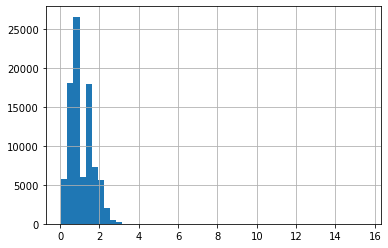

In [118]:
df['length_duration'].hist(bins=50)

In [122]:
df[(df['length_duration'] < 0.3) & (df['duration'] > 7) & (df["length"] < 3)][['audio_filepath',  'duration', 'text', 'lang']]

,audio_filepath,duration,text,lang
435,audio23_9332341_1697796344_997760274_1697796434-in.wav,7.180000,ha to'layman,uz
1025,audio23_9334577_1697967210_935627434_1697967256-in.wav,10.820000,bo'ladi bo'ladi,uz
1043,audio34_9313372_1697626561_913806999_1697626620-in.wav,7.180000,shunday,uz
1896,audio0_9393881_1698574794_919024141_1698574824-in.wav,7.180000,allo allo,uz
2077,audio3_9393248_1698485478_901114677_1698485507-in.wav,8.200000,men eshitaman,uz
...,...,...,...,...
133980,audio3_9821799_1702472468_942850545_1702472490-in.wav,8.200000,nima deysiz,uz
134382,audio3_9745996_1701960172_935260696_1701960237-in.wav,11.290023,allo allo,uz
134671,audio0_9744579_1701957582_996663078_1701957617-in.wav,8.200000,allo eshitaman,uz
134694,audio3_9786939_1702294214_979300034_1702294243-in.wav,9.190023,topshiramiz topshiramiz,uz


In [131]:
df[(df['length_duration'] < 0.3) & (df['duration'] > 7) & (df["length"] < 3)]["text"].value_counts().head(30)

text
eshitaman              7
allo eshitaman         5
yo'q                   4
tushundim              3
da allo                3
da eshitaman           3
ha ha                  3
ertaga                 3
a allo                 3
to'layman to'layman    3
assalomu alaykum       3
bo'ladi bo'ladi        3
bugun                  3
ertaga ertaga          3
tushunmadim            2
hov eshitaman          2
yaxshi                 2
hozir hozir            2
eshitaman allo         2
hop mayli              2
oyni oxiriga           2
haa allo               2
yaxshimisiz allo       2
ha to'layman           2
harakat qilamiz        2
ha allo                2
hop hop                2
allo kim               2
labbay allo            2
bo'pti                 2
Name: count, dtype: int64

In [129]:
ind_drop = df[(df['length_duration'] < 0.3) & (df['duration'] > 7) & (df["length"] < 3) & df["text"].str.contains("allo allo")].index

In [130]:
df.drop(ind_drop, inplace=True)

<ipython-input-130-8aeb4d3731c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind_drop, inplace=True)


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90216 entries, 4 to 135810
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           90216 non-null  int64  
 1   audio_filepath               90216 non-null  object 
 2   golden_status                90216 non-null  object 
 3   status                       90216 non-null  object 
 4   transcriber                  90216 non-null  object 
 5   superviser                   90216 non-null  object 
 6   golden_transcription         90216 non-null  object 
 7   text                         90216 non-null  object 
 8   theme                        90216 non-null  object 
 9   robot_transcription          90003 non-null  object 
 10  timestamp_create             90216 non-null  int64  
 11  timestamp_change             90216 non-null  int64  
 12  transcriber_id               90216 non-null  int64  
 13  superviser_id       

In [133]:
df.iloc[:,1] = df.iloc[:,1].apply(lambda x: f"/home/user/TRANSDUCER_r1.11.0/DATA/UZ/asr_uz/{x}")

In [134]:
with open('./uz_new_train_manifest.json', 'w', encoding='utf-8') as file:
    df[['audio_filepath',  'duration', 'text', 'lang']].to_json(file, orient='records', lines=True, force_ascii=False)